# Countries in the world by population (2022)

This list includes both **countries** and **dependent territories**. Data based on the latest United Nations Population Division estimates.
Click on the name of the country or dependency for current estimates (live population clock), historical data, and projected figures.

In [1]:
#Importing all the required libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Please scrape the table properly using BeautifulSoup.

In [2]:
# Givng Url from where the data to be scrapped 
url = "https://www.worldometers.info/world-population/population-by-country/"
data = requests.get(url).text

In [3]:
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# Getting all the classes of the tables 
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['table', 'table-striped', 'table-bordered']


In [5]:
tables = soup.find_all('table')

#  Looking for the table with the classes 'table'
table = soup.find('table', class_='table')

In [6]:
#Changing the names of the columns
df = pd.DataFrame(columns=['Country', 'Population', 'Yearly_Change', 'Net_Change', 'Density', 'Land_Area', 'Migrants', 
                           'Fert_Rate','Med_Age', 'Urban_population%', 'World_Share'])

# Collecting Ddata
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        Country = columns[1].text.strip()
        Population = columns[2].text.strip()
        Yearly_Change = columns[3].text.strip()
        Net_Change = columns[4].text.strip()
        Density = columns[5].text.strip()
        Land_Area = columns[6].text.strip()
        Migrants = columns[7].text.strip()
        Fert_Rate = columns[8].text.strip()
        Med_Age = columns[9].text.strip()
        Urban_population = columns[10].text.strip()
        World_Share = columns[11].text.strip()

        df = df.append({'Country': Country, 'Population': Population, 'Yearly_Change': Yearly_Change, 
                        'Net_Change': Net_Change, 'Density': Density, 'Land_Area': Land_Area,  'Migrants': Migrants,
                        'Fert_Rate': Fert_Rate, 'Med_Age': Med_Age, 'Urban_population%' : Urban_population,
                        'World_Share': World_Share}, ignore_index=True)

## Saving dataframe as the csv file to our pc.

In [7]:
# Saving the dataframe in the form of csv to the D Drive.
df.to_csv(r'D:\Data Science\Data science Bootcamp\Scrapped Data\Export_Dataframe.csv', index = False, header=True)

##  Performing some basic data cleaning

In [8]:
# Analysing the first 5 rows of the dataframe.
df.head(5)

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_population%,World_Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            235 non-null    object
 1   Population         235 non-null    object
 2   Yearly_Change      235 non-null    object
 3   Net_Change         235 non-null    object
 4   Density            235 non-null    object
 5   Land_Area          235 non-null    object
 6   Migrants           235 non-null    object
 7   Fert_Rate          235 non-null    object
 8   Med_Age            235 non-null    object
 9   Urban_population%  235 non-null    object
 10  World_Share        235 non-null    object
dtypes: object(11)
memory usage: 20.3+ KB


Here as we can see python is reading the datatype of all the columns as object, where except the **'Country'** columns all columns are having numerical datas.

In [10]:
# For changing the data type we need to remove ',' from the data.
df['Population'] = df['Population'].str.replace(',', '')
df['Net_Change'] = df['Net_Change'].str.replace(',', '')
df['Land_Area'] = df['Land_Area'].str.replace(',', '')
df['Migrants'] = df['Migrants'].str.replace(',', '')
df['Density'] = df['Density'].str.replace(',', '')
df['Fert_Rate'] = df['Fert_Rate'].str.replace(',', '')
df['Med_Age'] = df['Med_Age'].str.replace(',', '')

In [11]:
# Here in Yearly_Change, Urban_population and World_Share columns are containing % symbol.
# Therefore we are removing % symbol from all the data.
df['Yearly_Change'] = df['Yearly_Change'].str.replace(' %', '')
df['Urban_population%'] = df['Urban_population%'].str.replace(' %', '')
df['World_Share'] = df['World_Share'].str.replace(' %', '')

In [12]:
# Here we had also observed that Fert_Rate, Med_Age and Urban_population are containing N.A values so we are replacing those
# values with NaN with the help of Numpy library. 
df['Fert_Rate'] = df['Fert_Rate'].replace('N.A.', np.NaN)
df['Med_Age'] = df['Med_Age'].replace('N.A.', np.NaN)
df['Urban_population%'] = df['Urban_population%'].replace('N.A.', np.NaN)

In [13]:
# Observing last 5 rows.
df.tail(5)

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_population%,World_Share
230,Montserrat,4992,0.06,3,50,100,,NaN,NaN,10,0.00
231,Falkland Islands,3480,3.05,103,0,12170,,NaN,NaN,66,0.00
232,Niue,1626,0.68,11,6,260,,NaN,NaN,46,0.00
233,Tokelau,1357,1.27,17,136,10,,NaN,NaN,0,0.00
234,Holy See,801,0.25,2,2003,0,,NaN,NaN,NaN,0.00


Here as we can see that all the symbols are removed from the data. So this data is now ready to be converted in **Numeric** datatype.

In [14]:
# Converting the datatype to the numeric.
df['Population'] = pd.to_numeric(df['Population'])
df['Net_Change'] = pd.to_numeric(df['Net_Change'])
df['Land_Area'] = pd.to_numeric(df['Land_Area'])
df['Migrants'] = pd.to_numeric(df['Migrants'])
df['Density'] = pd.to_numeric(df['Density'])
df['Fert_Rate'] = pd.to_numeric(df['Fert_Rate'])
df['Med_Age'] = pd.to_numeric(df['Med_Age'])
df['Yearly_Change'] = pd.to_numeric(df['Yearly_Change'])
df['Urban_population%'] = pd.to_numeric(df['Urban_population%'])
df['World_Share'] = pd.to_numeric(df['World_Share'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            235 non-null    object 
 1   Population         235 non-null    int64  
 2   Yearly_Change      235 non-null    float64
 3   Net_Change         235 non-null    int64  
 4   Density            235 non-null    int64  
 5   Land_Area          235 non-null    int64  
 6   Migrants           201 non-null    float64
 7   Fert_Rate          201 non-null    float64
 8   Med_Age            201 non-null    float64
 9   Urban_population%  222 non-null    float64
 10  World_Share        235 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 20.3+ KB


Here as we can see the datatype of the numerical columns as been changed.

## Please report number of rows and columns

In [16]:
df.shape

(235, 11)

There are total **235 rows** and **11 columns** are there.

## Please report if there is any missing value in the dataset. (Do not remove or fill it)

In [17]:
df.isna().sum()

Country               0
Population            0
Yearly_Change         0
Net_Change            0
Density               0
Land_Area             0
Migrants             34
Fert_Rate            34
Med_Age              34
Urban_population%    13
World_Share           0
dtype: int64

Here the total counts of missing values had been given.

## Please report the top three countries based on the density column.

In [18]:
df.sort_values(by=['Density'], ascending=False).head(5)

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_population%,World_Share
213,Monaco,39242,0.71,278,26337,1,NaN,NaN,NaN,NaN,0.00
166,Macao,649335,1.39,8890,21645,30,5000.0,1.2,39.0,NaN,0.01
113,Singapore,5850342,0.79,46005,8358,700,27028.0,1.2,42.0,NaN,0.08
103,Hong Kong,7496981,0.82,60827,7140,1050,29308.0,1.3,45.0,NaN,0.10
218,Gibraltar,33691,-0.03,-10,3369,10,NaN,NaN,NaN,NaN,0.00


**Monaco, Macao** and **Singapore** are the top three countries based on the density column.

## Which country has the highest fertility rate and which country has the lowest fertility rate?

In [19]:
df[df['Fert_Rate'] == df['Fert_Rate'].max()]

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_population%,World_Share
55,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15.0,17.0,0.31


In [20]:
df[df['Fert_Rate'] == df['Fert_Rate'].min()]

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_population%,World_Share
27,South Korea,51269185,0.09,43877,527,97230,11731.0,1.1,44.0,82.0,0.66


- **Niger** has the highest fertility rate of **7.0**.
- **South Korea** has the Lowest fertility rate of **1.1**

## Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.

 - **Population**

<AxesSubplot:xlabel='Population', ylabel='Count'>

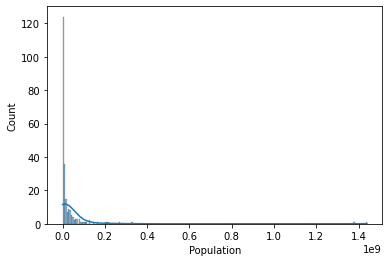

In [21]:
sns.histplot(x=df['Population'], kde=True)

In [22]:
df.Population.skew()

9.22957208791679

As we can observed in the Histogram, the data is **Highly Skewed**.

 - **Med_Age**

<AxesSubplot:xlabel='Med_Age', ylabel='Count'>

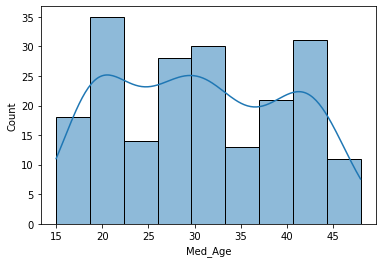

In [23]:
sns.histplot(x=df['Med_Age'], kde=True)

In [24]:
df.Med_Age.skew()

0.10846046956111798

As we can observed in the Histogram, the data is **Normally Distributed**.

 - **Urban_population%**

<AxesSubplot:xlabel='Urban_population%', ylabel='Count'>

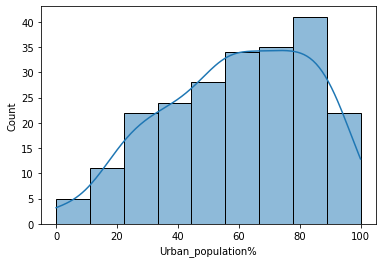

In [25]:
sns.histplot(x=df['Urban_population%'], kde=True)

In [26]:
df['Urban_population%'].skew()

-0.36411326135691713

As we can observed in the Histogram, the data is **Normally Distributed**.

## Please sort the population column based on lowest populated countries.

In [27]:
df.sort_values(by=['Population'], ascending=True)

,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_population%,World_Share
234,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.00
232,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.00
230,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
4,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
2,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
1,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
